## **Homework 1 - EDA for Hotel Revenue**
### What is my dataset and why do I think it is interesting?
**My dataset** is *Qatar Monthly Revenue per Available Rooms* which includes statistics that list the revenue per month based on the number of stars, dating back to January 2018.

**I think this dataset is interesting because** this data can be used to build a regression model that predicts the amount of revenue a hotel should expect for a specific month. Furthermore, it could help business men plan and decide their hotels' star rating based on monthly revenue.

**Link:** https://www.data.gov.qa/explore/dataset/qatar-monthly-statistics-marriages/table/?sort=month

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("qatar-monthly-statistics-revenue-per-available-room.csv", sep=";")

df.head()

,Month,فنادق 5 نجوم - Five Star Hotel,فنادق 4 نجوم - Four Star Hotel,فنادق 3 نجوم - Three Star Hotel,فنادق نجمة ونجمتين - One and Two Star Hotel
0,2023-10,367.0,140.0,149.0,143.0
1,2023-07,268.0,111.0,119.0,129.0
2,2023-06,293.0,122.0,130.0,136.0
3,2023-05,299.0,121.0,130.0,138.0
4,2023-04,279.0,105.0,118.0,131.0


### What was the required data clean up?

I decided to rename the column names for easier use and I need to **check if there are any NaN values**:

In [2]:
df.columns = ["Month", "Five Stars", "Four Stars", "Three Stars", "One - Two Stars"]

df.isna().sum()

Month              0
Five Stars         0
Four Stars         0
Three Stars        0
One - Two Stars    0
dtype: int64

Thankfully, there were no NaN values.

However, since I intend to deal with data based on the month primarily not the year. I decided to replace the value in the month column with an integer from 1 to 12.

In [3]:
df["Month"] = df["Month"].str.split("-").str[1].astype(int)
df.head()

,Month,Five Stars,Four Stars,Three Stars,One - Two Stars
0,10,367.0,140.0,149.0,143.0
1,7,268.0,111.0,119.0,129.0
2,6,293.0,122.0,130.0,136.0
3,5,299.0,121.0,130.0,138.0
4,4,279.0,105.0,118.0,131.0


After making the previous change, the data is no longer ordered. So, I will order it.

In [4]:
df = df.sort_values(by="Month")

**Finally, removing outliers:**

Due to the World Cup, there seemed to be some surprisingly anomolous data. Hence, I decided to remove this data to provide a more realistic analysis.

In [5]:
columns = ["Five Stars", "Four Stars", "Three Stars", "One - Two Stars"]

for column in columns:
    mean = df[column].mean()
    std_dev = df[column].std()

    # Setting the cutoff
    cutoff = std_dev * 3

    # Identifying outliers
    lower = mean - cutoff
    upper = mean + cutoff
    df = df[(df[column] >= lower) & (df[column] <= upper)]


### Univariate Analysis

The following code will be used to obtian measures of central tendency, and measures of variability.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64 entries, 67 to 32
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Month            64 non-null     int32  
 1   Five Stars       64 non-null     float64
 2   Four Stars       64 non-null     float64
 3   Three Stars      64 non-null     float64
 4   One - Two Stars  64 non-null     float64
dtypes: float64(4), int32(1)
memory usage: 2.8 KB


In [7]:
columns = ["Five Stars", "Four Stars", "Three Stars", "One - Two Stars"]
for column in columns:
    data = df[column]

    # Central Tendency
    mean_value = data.mean()
    median_value = data.median()
    mode_value = data.mode()

    # Variability
    range_value = data.max() - data.min()
    variance_value = data.var()
    std_deviation_value = data.std()
    iqr_value = data.quantile(0.75) - data.quantile(0.25)

    print(f"Mean: {mean_value}")
    print(f"Median: {median_value}")
    print(f"Mode: {mode_value[0]}")
    print(f"Variance: {variance_value}")
    print(f"Standard Deviation: {std_deviation_value}")
    print(f"Interquartile Range: {iqr_value} \n")

Mean: 318.839375
Median: 320.5
Mode: 320.0
Variance: 2502.6373043650797
Standard Deviation: 50.026366091942755
Interquartile Range: 58.75 

Mean: 144.35046875
Median: 149.0
Mode: 152.0
Variance: 405.8225315228175
Standard Deviation: 20.14503739194389
Interquartile Range: 27.75 

Mean: 137.065
Median: 132.0
Mode: 127.0
Variance: 546.5889365079365
Standard Deviation: 23.379241572556122
Interquartile Range: 18.5 

Mean: 110.76484375
Median: 110.0
Mode: 79.0
Variance: 1103.743917435516
Standard Deviation: 33.2226416384296
Interquartile Range: 55.75 



**Insights discovered:** we can now see that the mean of the revenue obtained by 5 star hotels is double what was obtained by  4 star hotels. Moreover, hotels with a 5 star rating had a wide range of revenue, this was induced by their significantly large standard deviation.

**Moving on to the plots:**

<Axes: xlabel='Month', ylabel='Three Stars'>

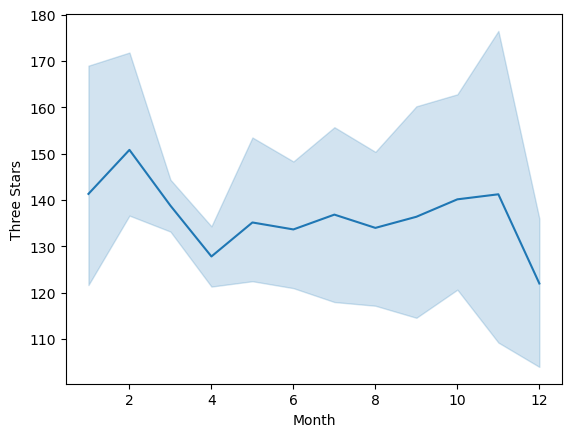

In [8]:
# Five stars - Lineplot
sns.lineplot(x="Month",y="Three Stars", data=df)

<Axes: ylabel='Four Stars'>

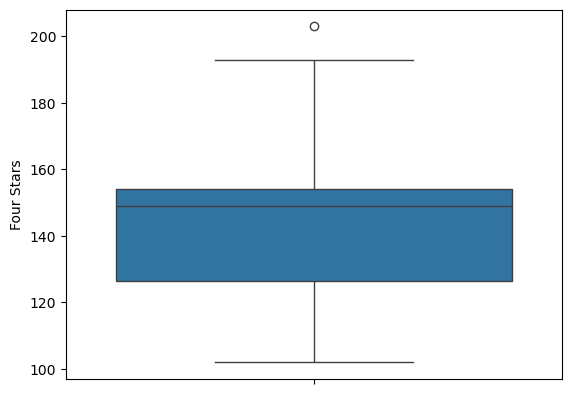

In [9]:
# Four stars - Boxplot
sns.boxplot(y="Four Stars", data=df)

<Axes: >

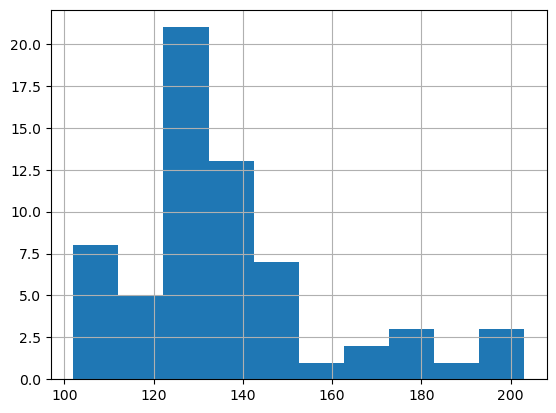

In [10]:
# Three stars - Histogram
df["Three Stars"].hist()

<Axes: xlabel='Month', ylabel='One - Two Stars'>

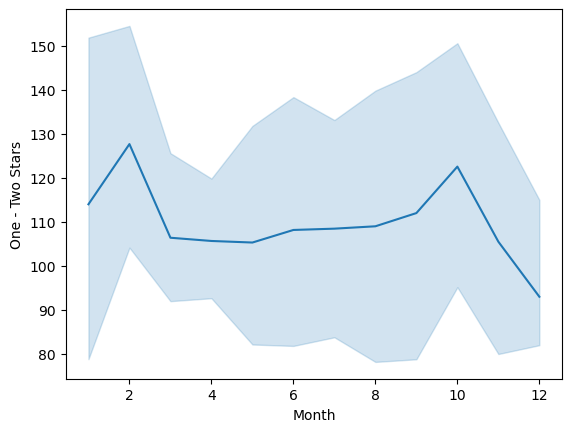

In [11]:
# One & Two stars - Lineplot
sns.lineplot(x="Month",y="One - Two Stars", data=df)

**Insights discovered:** Surprisingly, both one & two stars as well as 5 stars do not portray a trend in their revenue. I expected there to be a significant rise during holidays, such as the summer or winter break.

Furthermore, the 3 stars rating seemed to have a positive skew. This indicates that the median and mode are smaller that the mean.


### Bi/multivariate Analysis

<Axes: xlabel='Month', ylabel='Five Stars'>

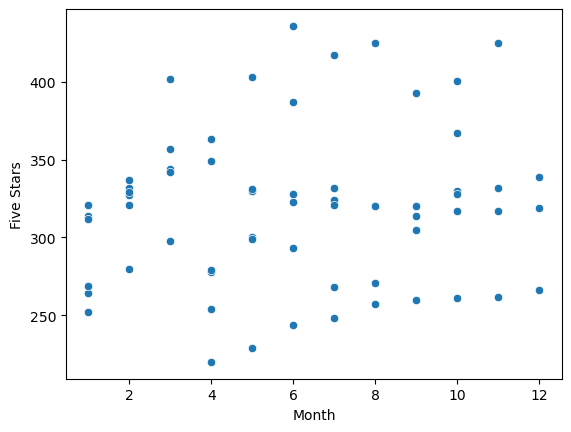

In [12]:
# Scatter plot - Bivariate Analysis
sns.scatterplot(x="Month", y="Five Stars", data=df)

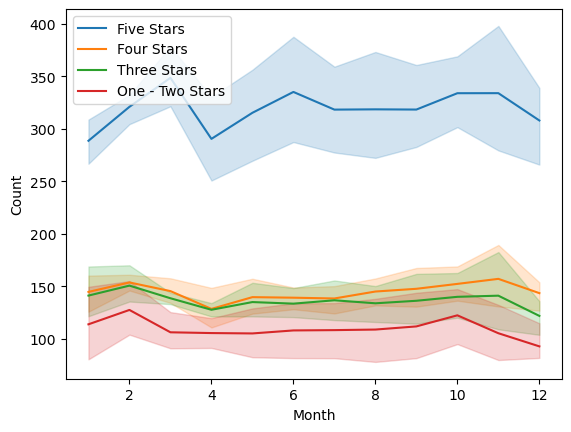

In [13]:
# Conjoined line-plot that includes all of the different ratings
df_long = df.melt(id_vars='Month', value_vars=["Five Stars", "Four Stars", "Three Stars", "One - Two Stars"],
                  var_name='Rating', value_name='Count')

sns.lineplot(data=df_long, x='Month', y='Count', hue='Rating')

plt.legend(loc="upper left")


<Axes: xlabel='Rating', ylabel='Count'>

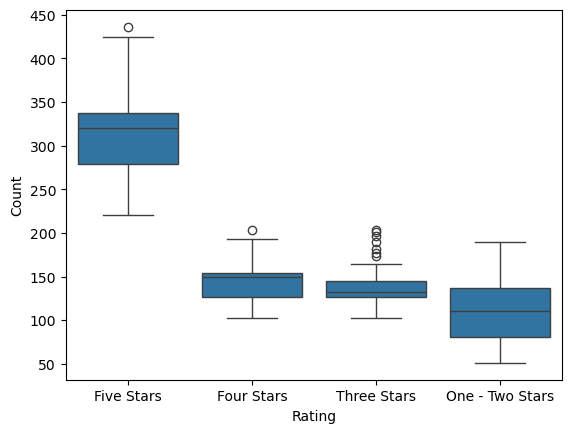

In [14]:
# Multi Boxplot
df_long = pd.melt(df, value_vars=["Five Stars", "Four Stars", "Three Stars", "One - Two Stars"], var_name='Rating', value_name='Count')
sns.boxplot(x='Rating', y='Count', data=df_long)

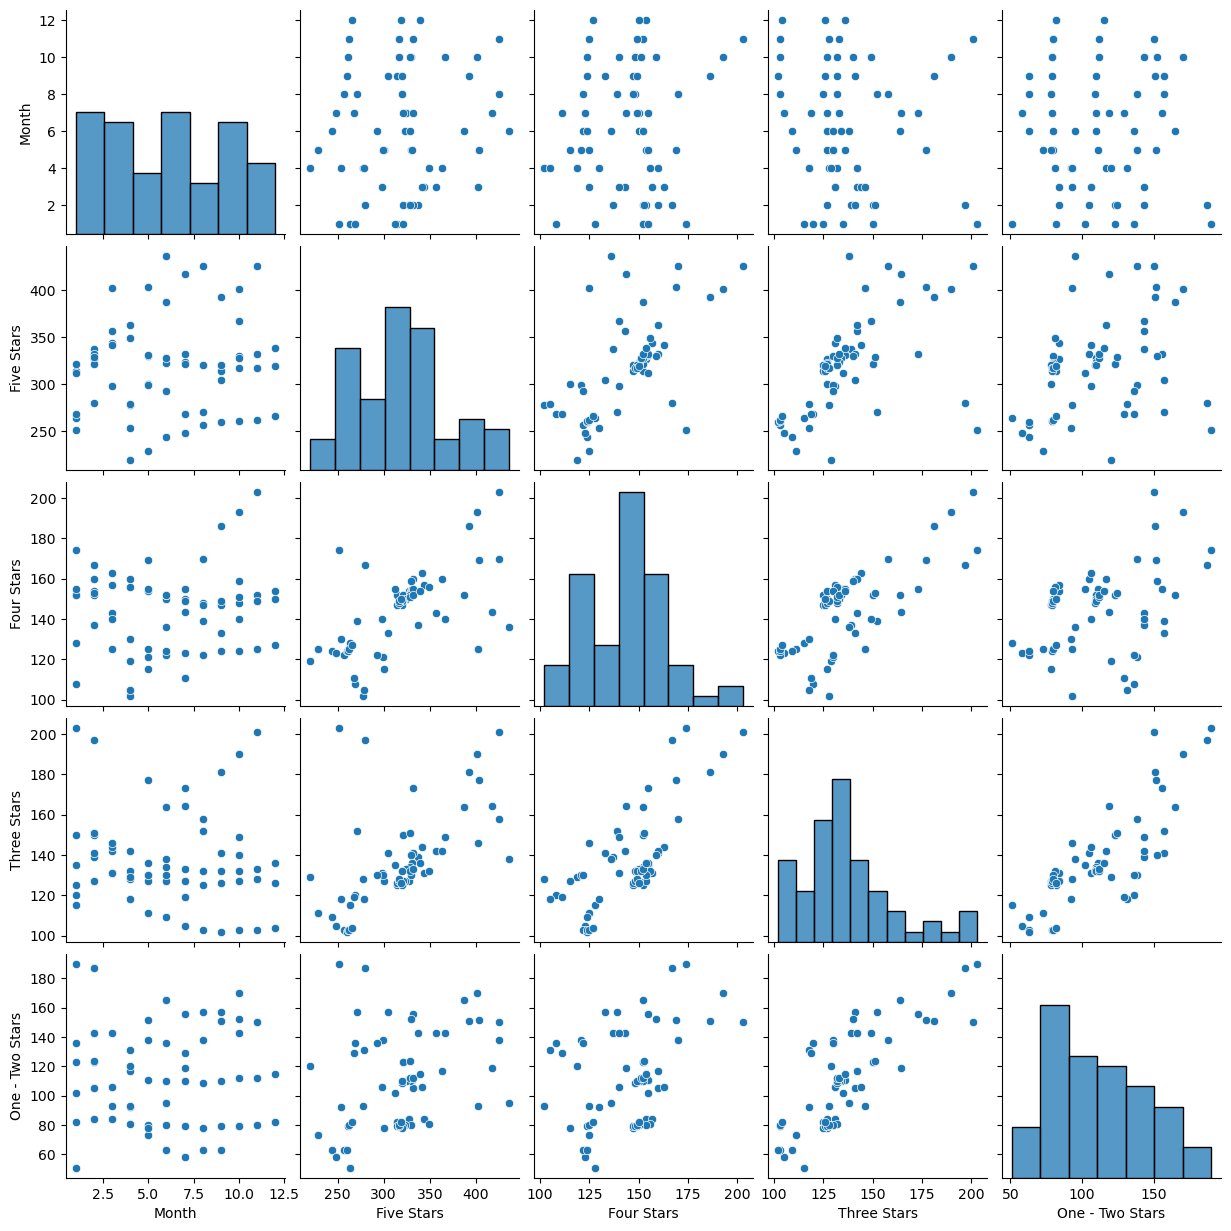

In [15]:
# Pairplot / Scatter Plot Matrix
sns.pairplot(df)

**Interpretations and insights:** 
- **Scatter plot:** I was hoping for there to be a correlation between the month and the revenue but clearly that was not the case, there was no correlation whatsoever between the month and the revenue obtained.
- **Lineplot & Boxplots:** These plots both clearly displayed a great difference between between five star hotels when compared to all of the other ratings. The other ratings where considerably similar when it comes to the revenue obtained.
- **Pairplot:** This plot showed an unexpected correlation between three star hotels and four star hotels. This correlation may be due to their similar revenues acquired. However, all of the other ratings and months did not portray any apparent correlation.



### Conclusions
Remarkably, the revenue obtained by both three star and four star hotels where strikingly similar. For an aspiring hotel constructor is to greatly consider a three star hotel as it would require less overhead when compared to four star hotels. One may also argue that three star hotels make considerably more profit due to the limited expenses.

Some future considerations would be to sum up all of the hotels' revenue regardless of their ratings and plot a scatter plot of revenue vs time. I am eager to know if this scatter plot would display any signs of correlation or not.